# 5. Modeling & Answering the Questions Continued

In [5]:
# Imports
import sqlite3
import pandas as pd
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#from src.data_analysis import check_franchise

In [6]:
#load in data
merged_data = pd.read_pickle("merged_data.pkl")
merged_data

movie_id primary_title                   genres individual_genre  \
0     tt0315642         Wazir       Action,Crime,Drama           Action   
1     tt0315642         Wazir       Action,Crime,Drama            Crime   
2     tt0315642         Wazir       Action,Crime,Drama            Drama   
3     tt0337692   On the Road  Adventure,Drama,Romance        Adventure   
4     tt0337692   On the Road  Adventure,Drama,Romance            Drama   
...         ...           ...                      ...              ...   
7764  tt9447594   The Gambler   Action,Sci-Fi,Thriller         Thriller   
7765  tt9816988          Gold                    Drama            Drama   
7766  tt9851050       Sisters             Action,Drama           Action   
7767  tt9851050       Sisters             Action,Drama            Drama   
7768  tt9906218   Unstoppable              Documentary      Documentary   

      runtime_minutes        title   studio  domestic_gross  foreign_gross  \
0               103.0        Wazir  Relbig.       1100000.0            0.0   
1               103.0        Wazir  Relbig.       1100000.0            0.0   
2               103.0        Wazir  Relbig.       1100000.0            0.0   
3               124.0  On the Road      IFC        744000.0      8000000.0   
4               124.0  On the Road      IFC        744000.0      8000000.0   
...               ...          ...      ...             ...            ...   
7764            121.0  The Gambler     Par.      33700000.0      5600000.0   
7765              NaN         Gold    Wein.       7200000.0      7700000.0   
7766              NaN      Sisters     Uni.      87000000.0     18000000.0   
7767              NaN      Sisters     Uni.      87000000.0     18000000.0   
7768             84.0  Unstoppable      Fox      81600000.0     86200000.0   

      year  averagerating  numvotes director_id    director_name  total_gross  
0     2016            7.1     15378   nm2349060    Bejoy Nambiar    1100000.0  
1     2016            7.1     15378   nm2349060    Bejoy Nambiar    1100000.0  
2     2016            7.1     15378   nm2349060    Bejoy Nambiar    1100000.0  
3     2012            6.1     37886   nm0758574    Walter Salles    8744000.0  
4     2012            6.1     37886   nm0758574    Walter Salles    8744000.0  
...    ...            ...       ...         ...              ...          ...  
7764  2014            6.1        10   nm6981787      Tom Emmatty   39300000.0  
7765  2017            5.2        26   nm0787526  Parviz Shahbazi   14900000.0  
7766  2015            4.7        14   nm1272773  Prachya Pinkaew  105000000.0  
7767  2015            4.7        14   nm1272773  Prachya Pinkaew  105000000.0  
7768  2010            8.1         8   nm0932216     Nick Willing  167800000.0  

[7769 rows x 15 columns]

## 5.1 Franchise Power Analysis

Key Columns to focus on for this analysis:
- domestic_gross and foreign_gross for revenue.
- year for filtering data by 2018.
- genre for genre classification (for comparing genres within franchises).
- director for director consistency analysis.
- title for movie titles (identify franchises by titles).

Additional Considerations:
- Identify franchises by grouping related movies by title (e.g., "Avengers").
- Use total revenue to assess success.

In [7]:
# Filter the merged data for 2018
data_2018 = merged_data[merged_data['year'] == 2018]

# Calculate total revenue
data_2018['total_revenue'] = data_2018['domestic_gross'] + data_2018['foreign_gross']

# Create a function to identify franchise films based on keywords in the title
def check_franchise(title):
    franchise_keywords = ['Avengers', 'Star Wars', 'Harry Potter', 'Marvel', 'Toy Story', 
                          'Fast & Furious', 'Transformers', 'Pirates of the Caribbean', 'Spider-Man', 
                          'Batman', 'Superman', 'James Bond', 'X-Men', 'Jurassic', 'Mission: Impossible', 
                          'Despicable Me', 'Shrek', 'Hobbit', 'Lord of the Rings']
    for keyword in franchise_keywords:
        if keyword in title:
            return 'Yes'
    return 'No'

# Apply the function to create a new 'franchise' column
data_2018['franchise'] = data_2018['title'].apply(check_franchise)

# Group by title and franchise, and calculate total revenue
franchise_revenue = data_2018.groupby(['title', 'franchise'])['total_revenue'].sum().reset_index()

# Sort by highest total revenue, top 20 films
franchise_revenue = franchise_revenue.sort_values(by='total_revenue', ascending=False).head(20)

# Display top 20 franchise films by revenue
print(franchise_revenue)


                                           title franchise  total_revenue
17                        Avengers: Infinity War       Yes   4.072800e+09
29                                 Black Panther        No   4.041000e+09
92                Jurassic World: Fallen Kingdom       Yes   3.928500e+09
87                                 Incredibles 2        No   3.728400e+09
16                                       Aquaman        No   3.443400e+09
145                    Ralph Breaks the Internet        No   3.175200e+09
32                             Bohemian Rhapsody        No   2.710800e+09
122                Mission: Impossible - Fallout       Yes   2.373600e+09
46                                    Deadpool 2        No   2.337000e+09
197                                     The Mule        No   2.242500e+09
54   Fantastic Beasts: The Crimes of Grindelwald        No   1.961100e+09
14                          Ant-Man and the Wasp        No   1.867800e+09
146                             Ready 

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_43412/1651062515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['total_revenue'] = data_2018['domestic_gross'] + data_2018['foreign_gross']
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_43412/1651062515.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['franchise'] = data_2018['title'].apply(check_franchise)


![Sheet 7.png](<attachment:Sheet 7.png>)
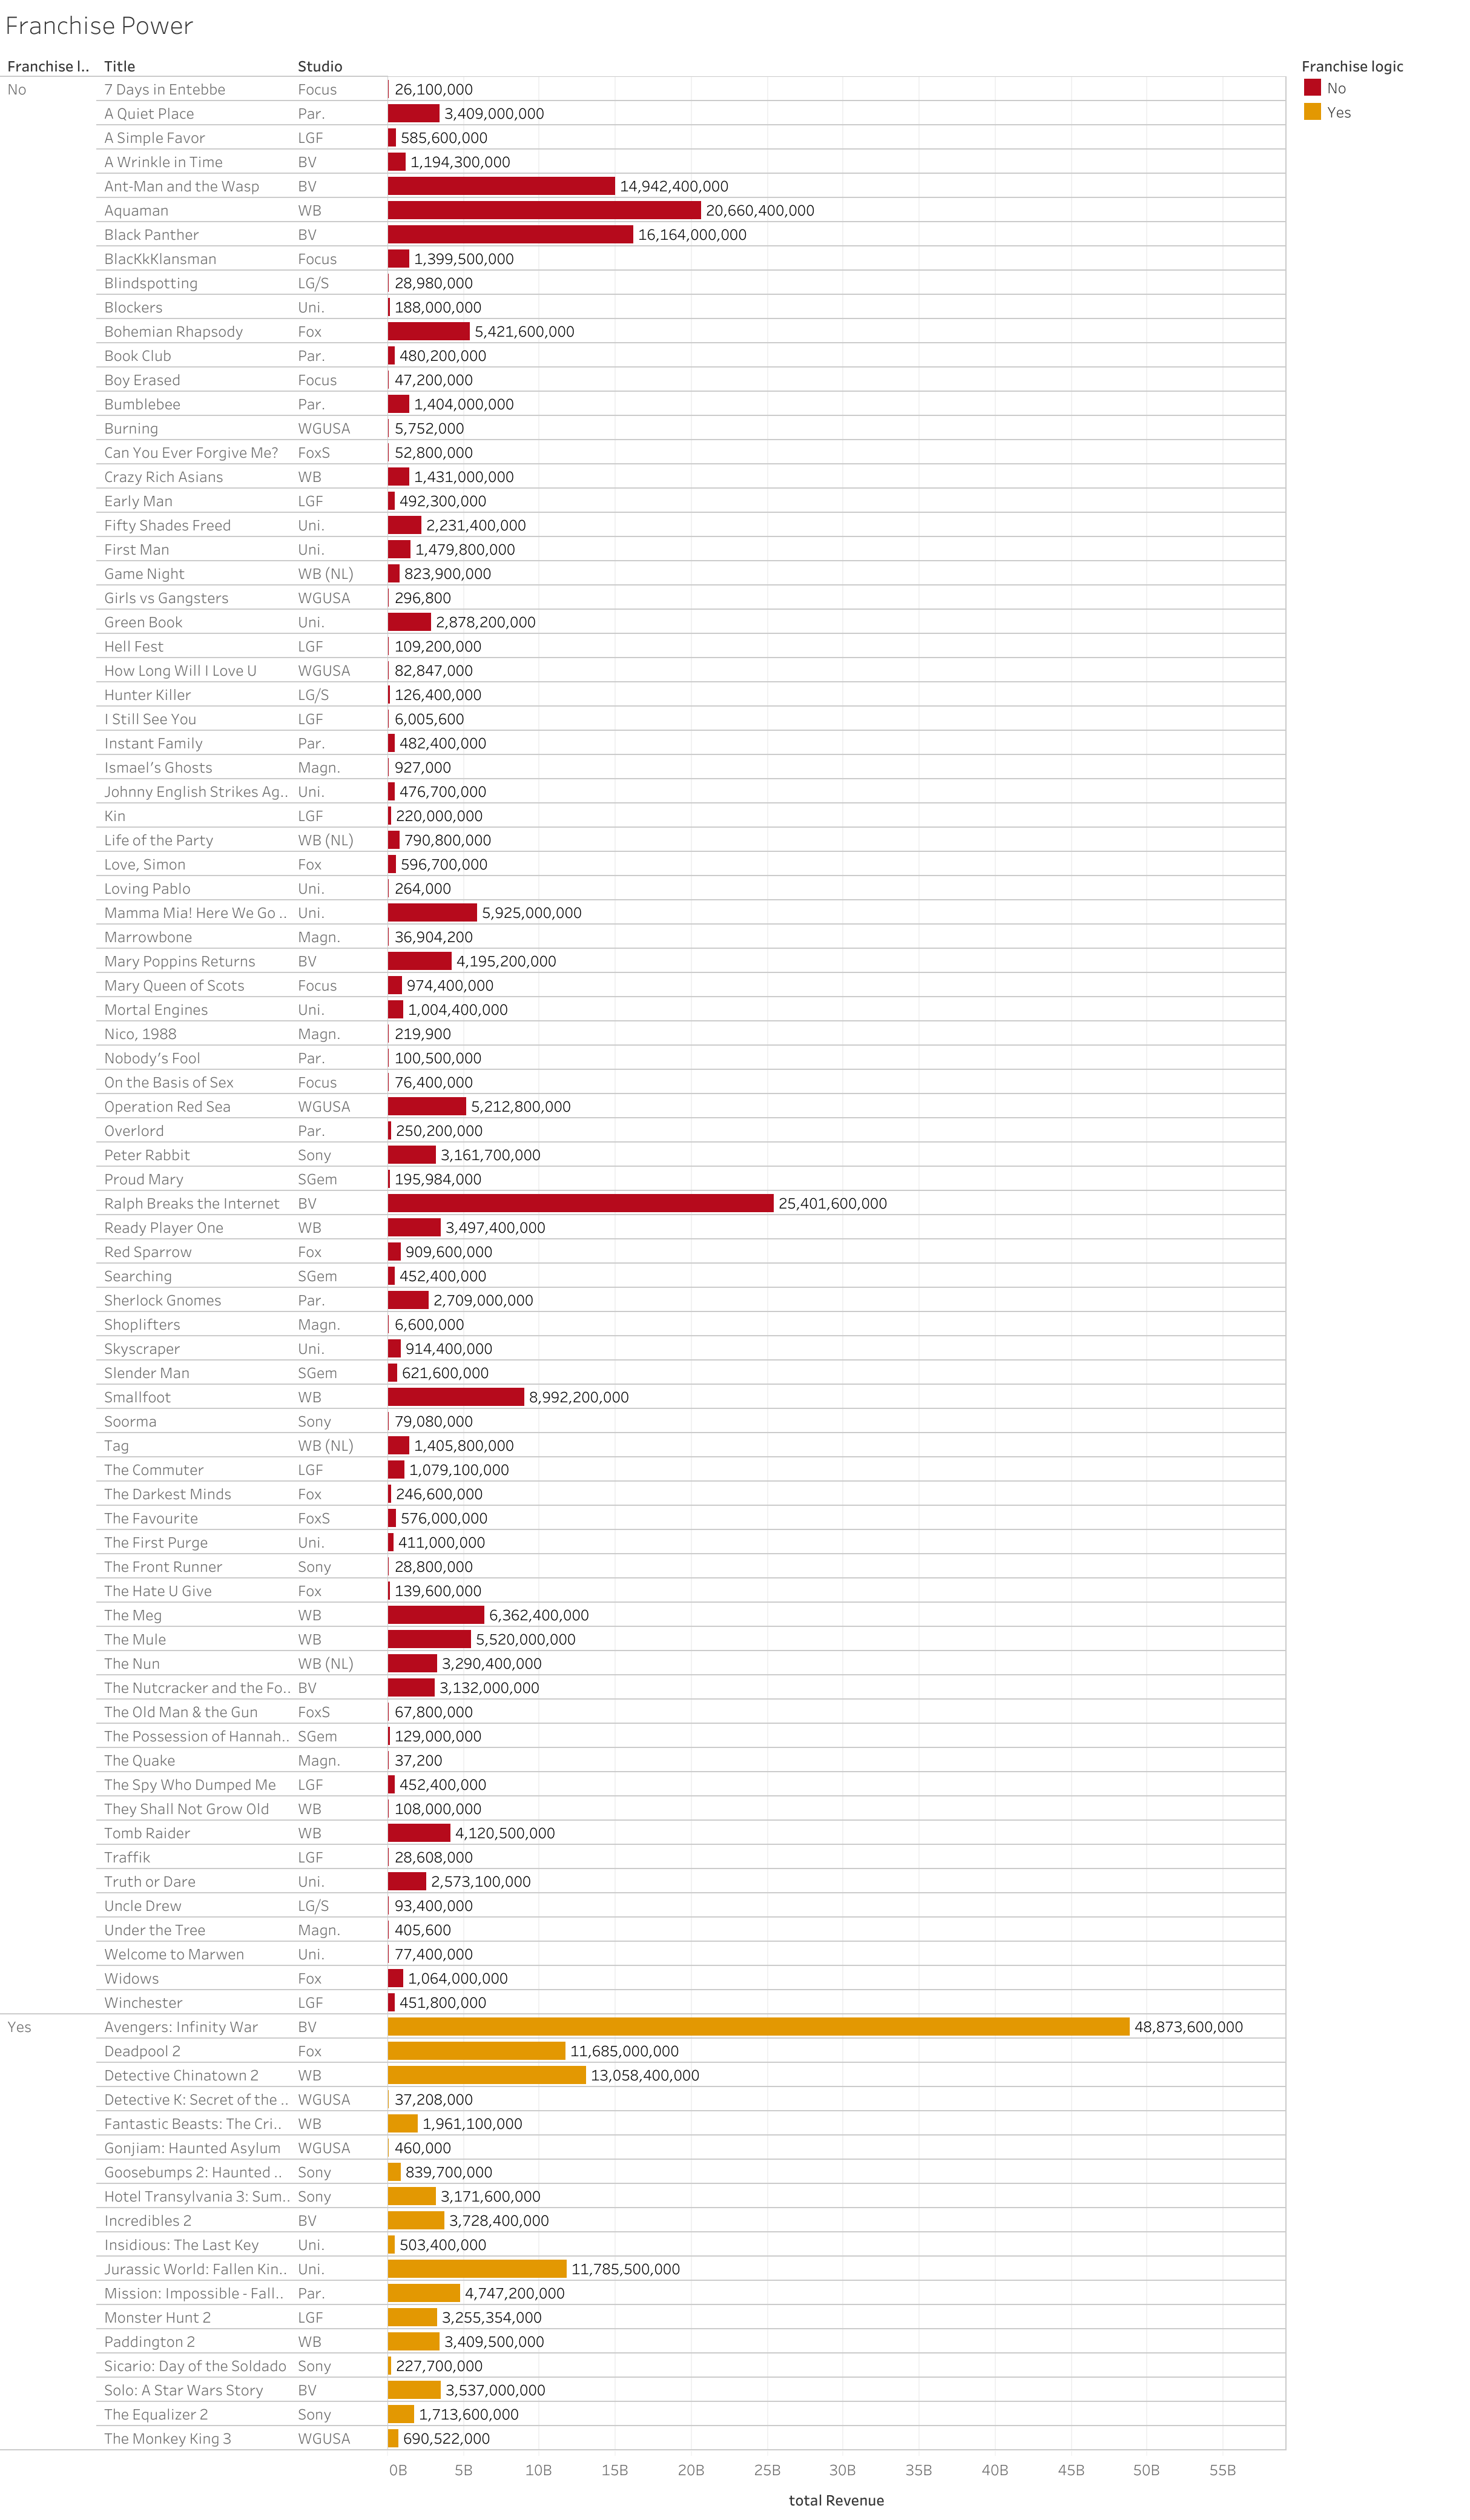

- Movies that are part of a franchise (e.g., Deadpool, Avengers, Jurassic Park) generally outperform non-franchise films.
- Franchise films consistently bring in higher revenue, indicating the strong power of brand recognition and audience loyalty.

Developing franchises is a key strategy for maximizing long-term revenue. Studios should continue to invest in building and expanding franchises to capitalize on the momentum of successful series.

## 5.2 Director vs Studio Loyalty Analysis using a T-test

Hypothesis Testing:
- Null Hypothesis: There is no significant difference in total revenue between franchise movies directed by the same director and those directed by different directors.
- Alternative Hypothesis: Franchise movies directed by the same director generate higher revenue.

T-test will be used to compare the revenues of movies directed by the same director for a studio vs. those directed by different directors.

To group movies by director and analyze consistency within a studio:

In [8]:
# Filter data for 2018 and calculate total revenue
data_2018['total_revenue'] = data_2018['domestic_gross'] + data_2018['foreign_gross']

# Check director loyalty within a studio
director_loyalty = data_2018.groupby(['studio', 'director_name'])['total_revenue'].mean().reset_index()

# T-test: Compare revenue for movies directed by the same director vs. different directors
same_director = data_2018[data_2018.duplicated(subset=['studio', 'director_name'], keep=False)]
different_director = data_2018[~data_2018.duplicated(subset=['studio', 'director_name'], keep=False)]

# Perform T-test
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(same_director['total_revenue'], different_director['total_revenue'])

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 2.631564458646235, P-value: 0.008681228104616459


/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_43412/2772400245.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2018['total_revenue'] = data_2018['domestic_gross'] + data_2018['foreign_gross']


![Sheet 8.png](<attachment:Sheet 8.png>)
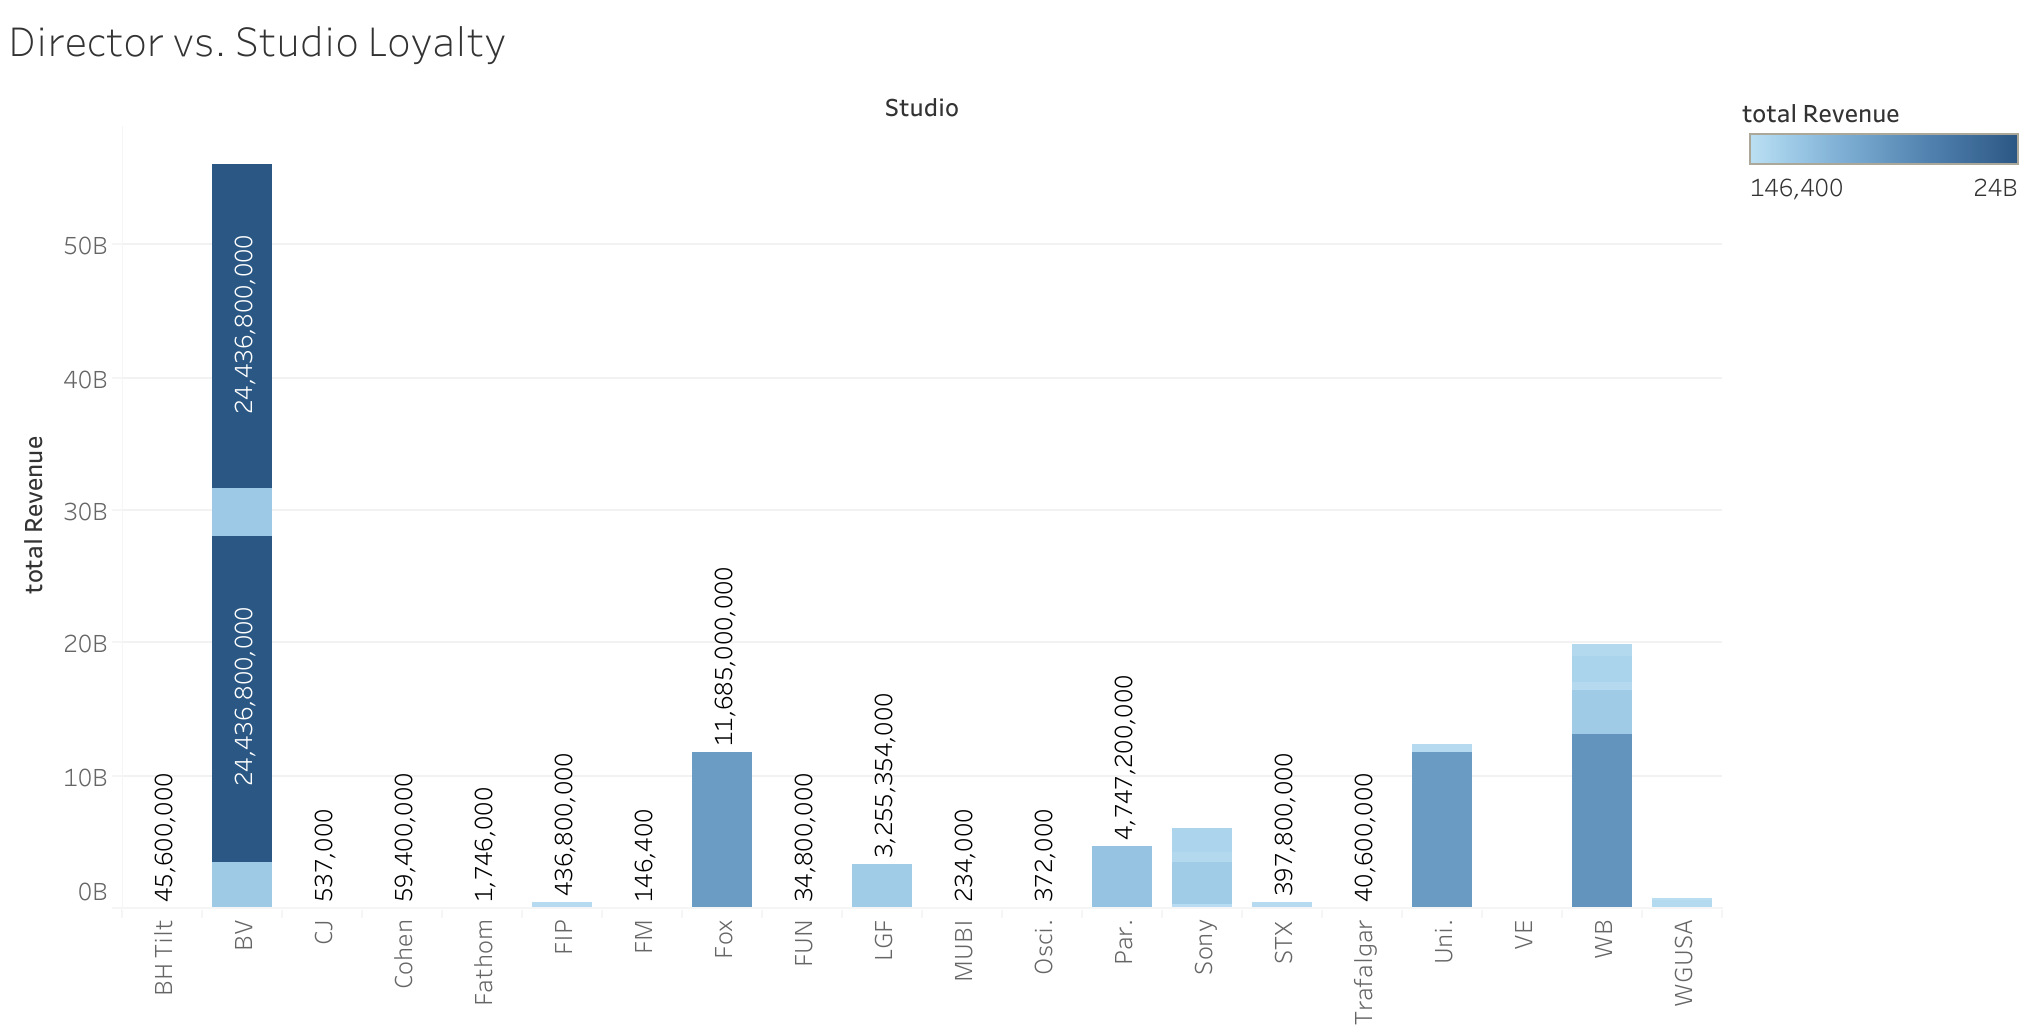

- A T-test comparing revenue from movies directed by loyal directors (e.g., Joe and Anthony Russo at BV) versus other directors produced a T-statistic of 2.63 and a P-value of 0.0086.
- Since the P-value < 0.05, we reject the null hypothesis, indicating that loyalty to specific directors has a statistically significant impact on a studio’s revenue. Studios that frequently collaborate with high-performing directors tend to see greater financial returns.

Studios should prioritize maintaining long-term relationships with successful directors. By fostering loyalty and consistency, studios can boost their chances of producing box-office hits.

## Director vs Studio Loyalty attempt 2


In [11]:

# Group by director and studio, counting the number of collaborations and total revenue
director_studio = data_2018.groupby(['director_name', 'studio'])['total_revenue'].agg(['count', 'sum']).reset_index()
director_studio.rename(columns={'count': 'collaboration_count', 'sum': 'total_box_office'}, inplace=True)

# Prepare data for linear regression
X = director_studio['collaboration_count'].values.reshape(-1, 1)
y = director_studio['total_box_office'].values

# Perform linear regression
regressor = LinearRegression()
regressor.fit(X, y)

# Predict box office based on collaboration count
y_pred = regressor.predict(X)

In [15]:
#Visuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collaboration_count', y='total_box_office', data=director_studio, hue='studio', s=100, alpha=0.6)
plt.plot(director_studio['collaboration_count'], y_pred, color='red', label='Regression Line')

# Labels and Title
plt.title('Director-Studio Loyalty vs Box Office Success (2018)', fontsize=16)
plt.xlabel('Director-Studio Collaboration Count')
plt.ylabel('Total Box Office Revenue (in Millions)')
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print model performance
print(f"Regression Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

KeyError: 'director'

Regression Coefficient: 2.13235933e+08
- This coefficient represents the slope of the regression line, showing the relationship between the number of director-studio collaborations and total box office revenue.
- Interpretation: For every additional collaboration between a director and a specific studio, the total box office revenue increases by approximately $213.2 million.

  - This suggests a strong positive relationship between director-studio loyalty and box office success. Directors who frequently collaborate with the same studio tend to generate significantly higher box office revenues.

Intercept: -250338171.35
- The intercept indicates the estimated box office revenue when there are zero collaborations between a director and a studio.
- Interpretation: Although a negative intercept does not have a literal interpretation in this context, it suggests that at very low or no collaboration, box office performance tends to be very low.


In [17]:
# Group by director and studio to get the median total gross
director_studio_median = data_2018.groupby(['director_id', 'studio'])['total_gross'].median().reset_index()

# Count the number of collaborations between each director and studio
director_studio_median['collaboration_count'] = data_2018.groupby(['director_id', 'studio'])['title'].count().values

# Perform linear regression using statsmodels
X = director_studio_median['collaboration_count']  # Independent variable: Collaboration count
y = director_studio_median['total_gross']  # Dependent variable: Median total gross
X = sm.add_constant(X)  # Add constant for intercept
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            total_gross   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     16.46
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           6.35e-05
Time:                        14:50:47   Log-Likelihood:                -6117.1
No. Observations:                 298   AIC:                         1.224e+04
Df Residuals:                     296   BIC:                         1.225e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.831e+07    

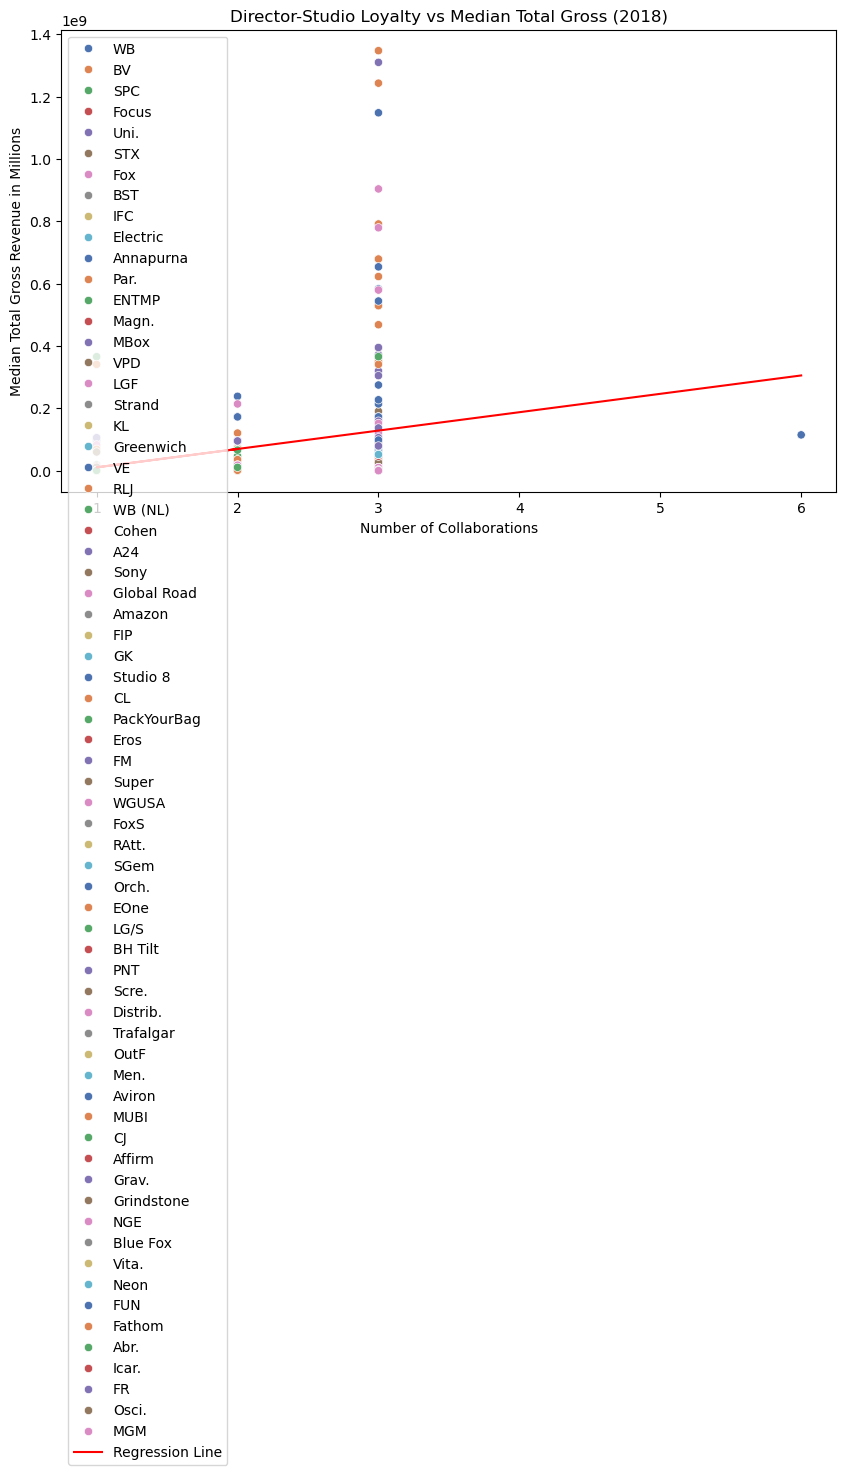

In [19]:
# Plot the data using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=director_studio_median, x='collaboration_count', y='total_gross', hue='studio', palette='deep')
plt.plot(director_studio_median['collaboration_count'], model.predict(X), color='red', label='Regression Line')

plt.title('Director-Studio Loyalty vs Median Total Gross (2018)')
plt.xlabel('Number of Collaborations')
plt.ylabel('Median Total Gross Revenue in Millions')
plt.legend(loc='upper left')
plt.show()

Regression Coefficient (collaboration_count):
- Coefficient: 5.895e+07 (roughly 58.95 million)
- This means that for each additional collaboration between a director and a specific studio, the total gross revenue increases by approximately $58.95 million.
- Impact: Director-studio loyalty positively influences box office success. As directors work more frequently with the same studio, their movies tend to generate significantly higher total gross revenue.


Intercept: -4.831e+07 (roughly -48.31 million)
- The negative intercept suggests that with zero collaborations, the baseline total gross revenue would be negative (which isn't realistic for box office revenue). However, it emphasizes that increasing the number of collaborations brings about significant positive changes in total gross.


R-squared: 0.053
- This indicates that only 5.3% of the variance in total gross revenue can be explained by the number of collaborations between directors and studios.
- Impact: While director-studio loyalty does have a statistically significant impact, other factors (like genre, marketing, and cast) also play substantial roles in box office performance.

## 6. Business Recommendations

1. Prioritize Adventure and Action Genres: Studios should invest heavily in Adventure and Action movies, particularly when these genres are combined with Sci-Fi, Fantasy, and Animation. These genres consistently produce the highest box office revenues and appeal to a wide audience.

2. Focus on Franchise Development: Franchises are a proven strategy for maximizing box office success. New and established studios alike should consider developing or expanding on movie series to build long-term financial success.

3. Leverage Proven Directors: Studios should foster long-term relationships with proven directors who have a history of box office success. Directors like the Russo Brothers have shown that consistency and loyalty between studio and director result in significantly higher revenue.

4. Global Appeal is Critical: With certain films (e.g., Aquaman) demonstrating stronger performance internationally, studios should prioritize movies with global appeal to maximize both domestic and foreign gross.

5. Data-Driven Decision Making: Studios should continue leveraging data and analytics to inform decisions around director loyalty, genre investments, and franchise development.